# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 4 - Regressão Linear Simples</font>

****** Este Jupyter Notebook foi atualizado para a versão 3.6.1. da Linguagem Python em 05/07/2017 ******

## Carregando o Dataset Boston Houses

Dataset: https://archive.ics.uci.edu/ml/datasets/Housing

In [ ]:
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's

In [1]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 

## Trabalhando com o Dataset

In [2]:
# Convertendo o dataset em um dataframe com Pandas
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [3]:
dataset.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Calculando a média da variável de resposta
valor_medio_esperado_na_previsao = dataset['target'].mean()

In [5]:
valor_medio_esperado_na_previsao

22.532806324110698

In [6]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que y = média da variável target (valores observados)
# ********* Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos ainda não foram calculados **********
squared_errors = pd.Series(valor_medio_esperado_na_previsao - dataset['target'])**2 
SSE = np.sum(squared_errors)
print ('Soma dos Quadrados dos Erros (SSE): %01.f' % SSE)

Soma dos Quadrados dos Erros (SSE): 42716


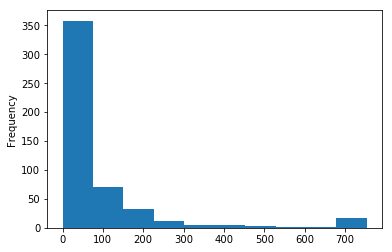

In [7]:
# Histograma dos erros
hist_plot = squared_errors.plot('hist')

In [8]:
# Função para calcular o desvio padrão
def calc_desvio_padrao(variable, bias = 0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations - min(bias, 1)))

In [9]:
# Imprimindo o desvio padrão via fórmula e via NumPy
print ('Resultado da Função: %0.5f Resultado do Numpy: %0.5f' % (calc_desvio_padrao(dataset['RM']), np.std(dataset['RM'])))

Resultado da Função: 0.70192 Resultado do Numpy: 0.70192


In [10]:
# Funções para calcular a variância e a correlação
def covariance(variable_1, variable_2, bias = 0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations - min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1, var2, bias = 0):
    return covariance(standardize(var1), standardize(var2), bias)

In [11]:
# Compara o resultado das nossas funções com a função pearsonr do SciPy
from scipy.stats.stats import pearsonr
print ('Nossa estimativa de Correlação: %0.5f' % (correlation(dataset['RM'], dataset['target'])))
print ('Correlação a partir da função pearsonr do SciPy: %0.5f' % pearsonr(dataset['RM'], dataset['target'])[0])

Nossa estimativa de Correlação: 0.69536
Correlação a partir da função pearsonr do SciPy: 0.69536


In [12]:
# Definindo o range dos valores de x e y
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

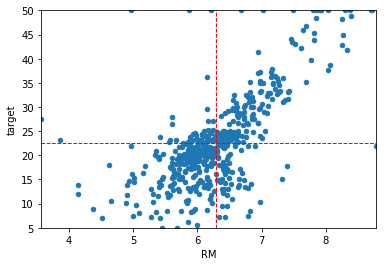

In [13]:
# Plot dos valores de x e y com a média
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Cálculo da média
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

## Regressão Linear com o StatsModels

In [14]:
# Importando as funções
import statsmodels.api as sm
import statsmodels.formula.api as smf # (simula a criação do modelo em linguagem R )

/Users/dmpm/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [15]:
# Gerando X e Y. Vamos adicionar a constante ao valor de X, gerando uma matrix.
y = dataset['target']
X = dataset['RM']

# Esse comando adiciona os valores dos coefientes à variável X (o bias será calculado internamente pela função)
X = sm.add_constant(X)

In [16]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [17]:
# Essa alternativa é muito similar ao código equivalente em linguagem R
modelo_v1 = smf.ols(formula = 'target ~ RM', data = dataset)
modelo_v2 = modelo_v1.fit()

In [18]:
# Criando um modelo Ordinary Least Squares (outra forma de se referir a regressão linear)
modelo_v1 = sm.OLS(y, X)
modelo_v2 = modelo_v1.fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 09 Jul 2017   Prob (F-statistic):           2.49e-74
Time:                        22:25:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Imprimindo os Parâmetros
print (modelo_v2.params)

const   -34.670621
RM        9.102109
dtype: float64


In [20]:
# Gerando os valores previstos
valores_previstos = modelo_v2.predict(X)
valores_previstos

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
5      23.855940
6      20.051258
7      21.507596
8      16.583355
9      19.978442
10     23.373528
11     20.023952
12     18.931699
13     19.477826
14     20.815836
15     18.431083
16     19.350396
17     19.851012
18     14.990486
19     17.457157
20     16.028126
21     19.623459
22     21.234533
23     18.239939
24     19.250273
25     16.292087
26     18.239939
27     20.369832
28     24.447577
29     26.076855
         ...    
476    24.347454
477    13.606965
478    21.625923
479    22.026416
480    22.144743
481    26.768615
482    29.599371
483    17.775731
484    18.767861
485    22.781891
486    20.979674
487    19.077333
488    14.972282
489    14.608197
490    11.686420
491    19.787297
492    19.787297
493    17.275115
494    19.268477
495    16.938337
496    14.389747
497    18.066999
498    20.114973
499    16.019024
500    20.187790
501    25.339584
502    21.034286
503    28.8256

In [21]:
# Fazendo previsões
RM = 5
Xp = np.array([1, RM])
print ("Se RM = %01.f nosso modelo prevê que a mediana da taxa de ocupação é %0.1f" % (RM, modelo_v2.predict(Xp)))

Se RM = 5 nosso modelo prevê que a mediana da taxa de ocupação é 10.8


### Gerando um ScatterPlot com a Linha de Regressão

In [22]:
# Range de valores para x e y
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]

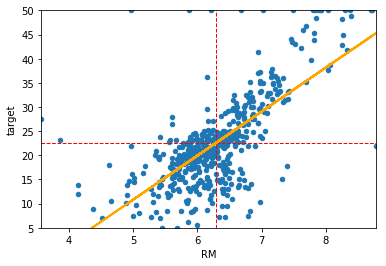

In [23]:
# Primeira camada do Scatter Plot
scatter_plot = dataset.plot(kind = 'scatter', x = 'RM', y = 'target', xlim = x_range, ylim = y_range)

# Segunda camada do Scatter Plot (médias)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color = 'red', linewidth = 1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color = 'red', linewidth = 1)

# Terceira camada do Scatter Plot (linha de regressão)
regression_line = scatter_plot.plot(dataset['RM'], valores_previstos, '-', color = 'orange', linewidth = 2)

In [24]:
# Comparação entre a função predict() e a função dot()
coeficientes = np.array(modelo_v2.params)
previsoes_dot = np.dot(X, coeficientes)
print ("Usando a função predict(): %s" % valores_previstos[:10])
print ("Usando coeficientes e função dot: %s" % previsoes_dot[:10])

Usando a função predict(): 0    25.175746
1    23.774021
2    30.728032
3    29.025938
4    30.382152
5    23.855940
6    20.051258
7    21.507596
8    16.583355
9    19.978442
dtype: float64
Usando coeficientes e função dot: [ 25.17574577  23.77402099  30.72803225  29.02593787  30.38215211
  23.85593997  20.05125842  21.50759586  16.5833549   19.97844155]


In [25]:
# Gerando os resíduos
residuos = dataset['target'] - valores_previstos
residuos_normalizados = standardize(residuos)

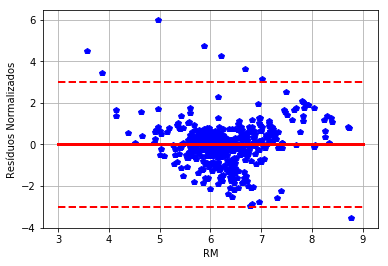

In [26]:
# ScatterPlot dos resíduos
residual_scatter_plot = plt.plot(dataset['RM'], residuos_normalizados,'bp')
plt.xlabel('RM') 
plt.ylabel('Resíduos Normalizados') 
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color = 'red', linewidth = 3)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color = 'red', linewidth = 2)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color = 'red', linewidth = 2)
plt.grid()

## Regressão Linear com Scikit-Learn

In [27]:
from sklearn import linear_model

In [28]:
# Cria o objeto
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [29]:
# Define os valores de x e y
num_observ = len(dataset)
X = dataset['RM'].values.reshape((num_observ, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = dataset['target'].values # y pode ser um vetor

In [30]:
# Aplica o modelo - fit()
modelo.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# Imprime os coeficientes
print (modelo.coef_)
print (modelo.intercept_)

[ 9.10210898]
-34.6706207764


In [32]:
# Imprime as previsões
print (modelo.predict(X)[:10])

[ 25.17574577  23.77402099  30.72803225  29.02593787  30.38215211
  23.85593997  20.05125842  21.50759586  16.5833549   19.97844155]


### Comparação StatsModels x ScikitLearn

In [33]:
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples = 10000000, n_features = 1, n_targets = 1, random_state = 101)

In [34]:
%%time
sk_linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
sk_linear_regression.fit(HX,Hy)

CPU times: user 669 ms, sys: 154 ms, total: 823 ms
Wall time: 371 ms


In [35]:
%%time
sm_linear_regression = sm.OLS(Hy, sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: user 2.2 s, sys: 653 ms, total: 2.85 s
Wall time: 1.21 s


## Cost Function de um Modelo de Regressão Linear

O objetivo da regressão linear é buscar a equação de uma linha de regressão que minimize a soma dos erros ao quadrado, da diferença entre o valor observado de y e o valor previsto.

Existem alguns métodos para minimização da Cost Function tais como: Pseudo-inversão, Fatorização e Gradient Descent.

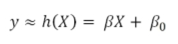

In [36]:
from IPython.display import Image
Image('formula-regressao.png')

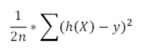

In [37]:
from IPython.display import Image
Image('formula-cost-function.png')

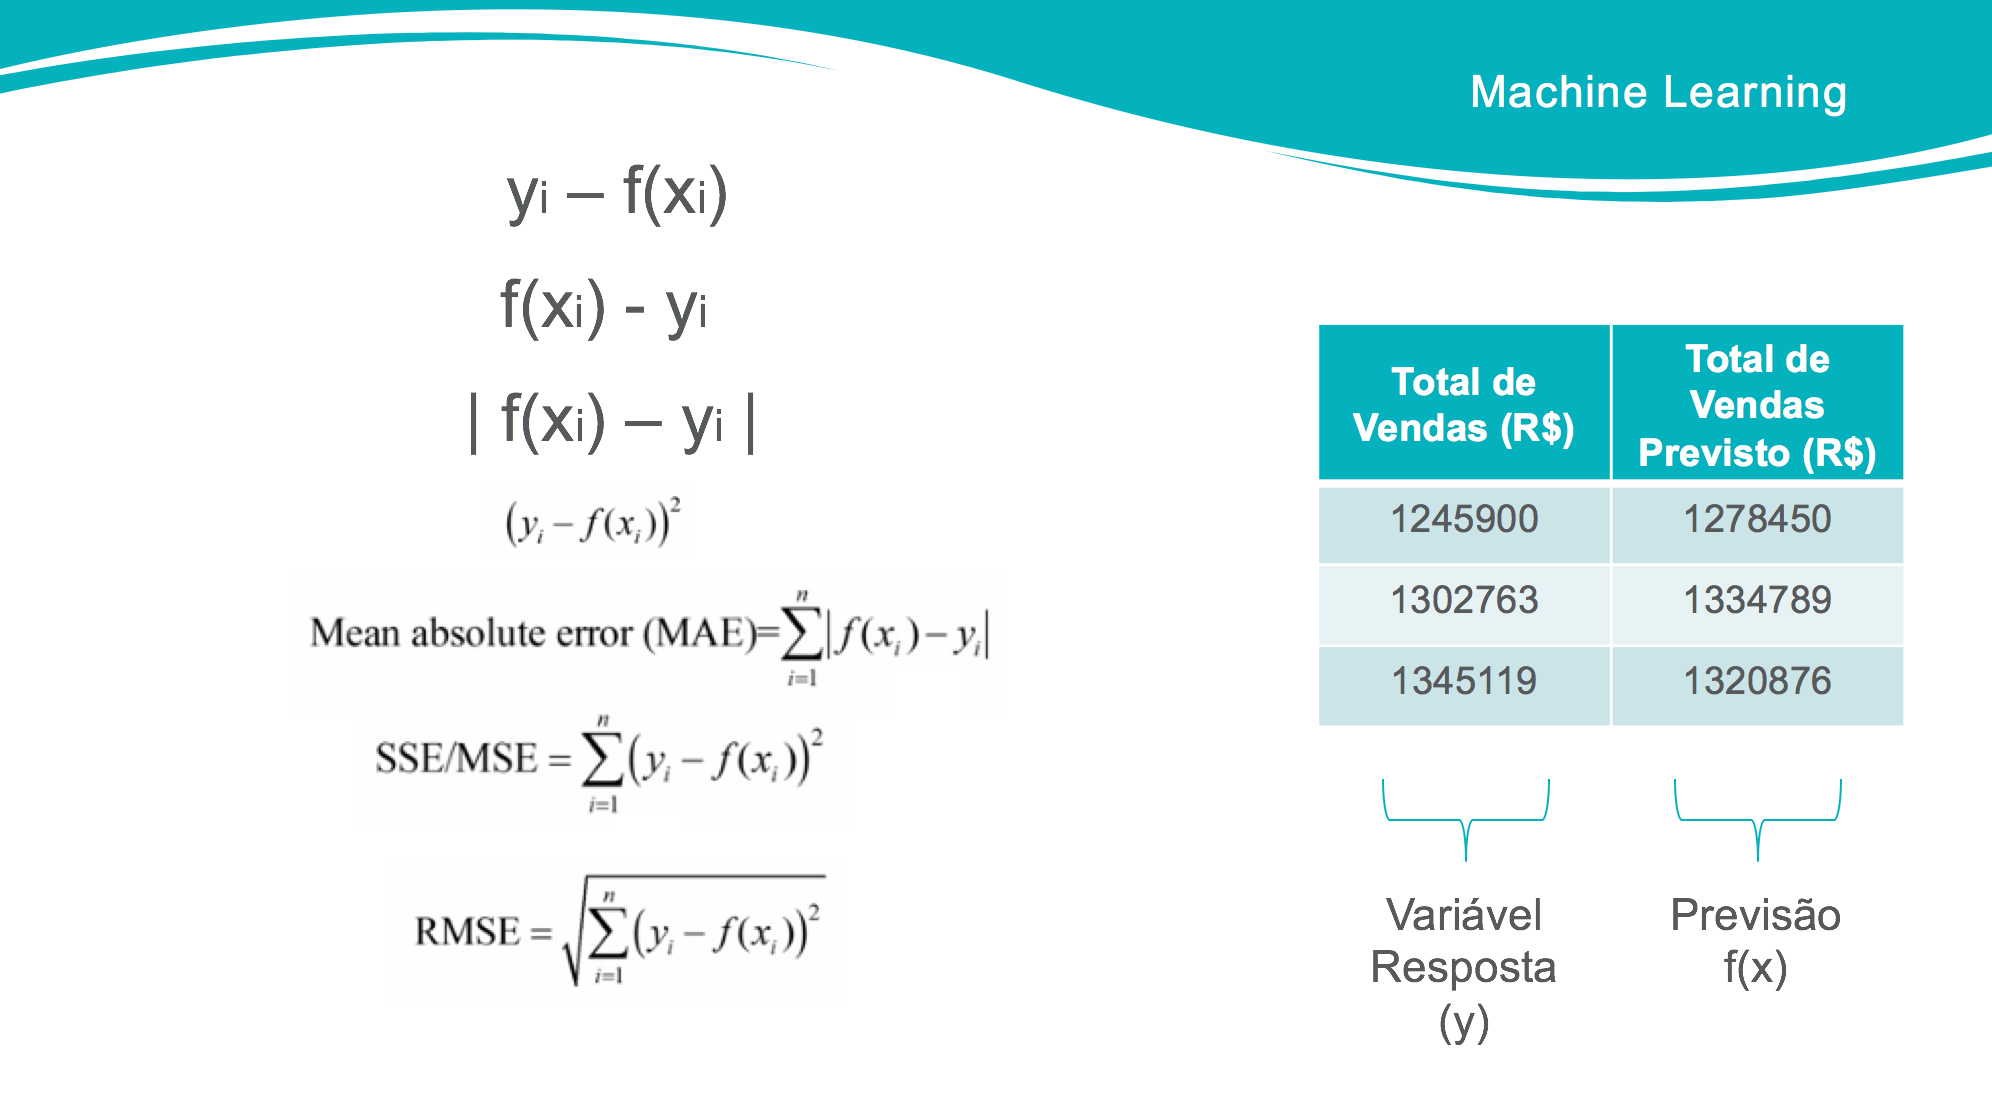

In [38]:
from IPython.display import Image
Image('formulas.png')

In [39]:
# Definindo 2 conjuntos de dados
import numpy as np
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])

In [40]:
# Função para cálculo da Cost Function
def squared_cost(v, e):
 return np.sum((v - e) ** 2)

In [41]:
# A função fmin() tenta descobrir o valor do somatório mínimo dos quadrados
from scipy.optimize import fmin
xopt = fmin(squared_cost, x0 = 0, xtol = 1e-8, args = (x,))

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [42]:
print ('Resultado da Otimização: %0.1f' % (xopt[0]))
print ('Média: %0.1f' % (np.mean(x)))
print ('Mediana: %0.1f' % (np.median(x)))

Resultado da Otimização: 7.8
Média: 7.8
Mediana: 8.0


In [43]:
def absolute_cost(v,e):
 return np.sum(np.abs(v - e))

In [44]:
xopt = fmin(absolute_cost, x0 = 0, xtol = 1e-8, args = (x,))

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


In [45]:
print ('Resultado da Otimização: %0.1f' % (xopt[0]))
print ('Média %0.1f' % (np.mean(x)))
print ('Mediana %0.1f' % (np.median(x)))

Resultado da Otimização: 8.0
Média 7.8
Mediana 8.0


## Minimizando a Cost Function 

Minimizando a Cost Function com Pseudo-Inversão

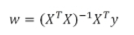

In [46]:
from IPython.display import Image
Image('formula-pseudo.png')

In [47]:
# Definindo x e y
num_observ = len(dataset)
X  = dataset['RM'].values.reshape((num_observ, 1)) # X deve ser uma matriz
Xb = np.column_stack((X, np.ones(num_observ)))
y  = dataset['target'].values # y pode ser um vetor

In [48]:
# Funções para matriz inversa e equações normais
def matriz_inversa(X, y, pseudo = False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T,y))
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T,y))

def normal_equations(X,y):
    return np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

In [49]:
# Imprime os valores
print (matriz_inversa(Xb, y))
print (matriz_inversa(Xb, y, pseudo = True))
print (normal_equations(Xb, y))

[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]


## Aplicando o Gradient Descent

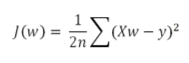

In [50]:
from IPython.display import Image
Image('formula-gradient-descent1.png')

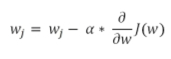

In [51]:
# Alfa é chamado de taxa de aprendizagem
from IPython.display import Image
Image('formula-gradient-descent2.png')

In [52]:
# Definindo x e y
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1)) 
X = np.column_stack((X,np.ones(observations))) 
y = dataset['target'].values 

In [53]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha = 0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha = 0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha = alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path

In [54]:
# Definindo o valor de alfa
# Alfa é chamado de taxa de aprendizagem
alpha = 0.048

# Otimizando a Cost Function
w, path = optimize(X, y, alpha, eta = 10**-12, iterations = 25000)

In [55]:
# Imprimindo o resultado
print ("Valor Final dos Coeficientes: %s" % w)

Valor Final dos Coeficientes: [9.1021032422090862, -34.670584270165364]


In [56]:
# Imprimindo o resultado
print ("Percorrendo o Caminho do Gradiente em que o erro ao quadrado era %s" % path)

Percorrendo o Caminho do Gradiente em que o erro ao quadrado era [309031.28432622412, 23793.479862335138, 22470.812227470229, 22158.452400025926, 22084.685824637549, 22067.265186109693, 22063.151146043165, 22062.179578574967, 22061.950134201557, 22061.895948854453, 22061.883152498645, 22061.880130524431, 22061.879416858112, 22061.879248319405, 22061.879208517479, 22061.879199117899, 22061.879196898102, 22061.879196373873, 22061.879196250073, 22061.879196220842, 22061.879196220114]


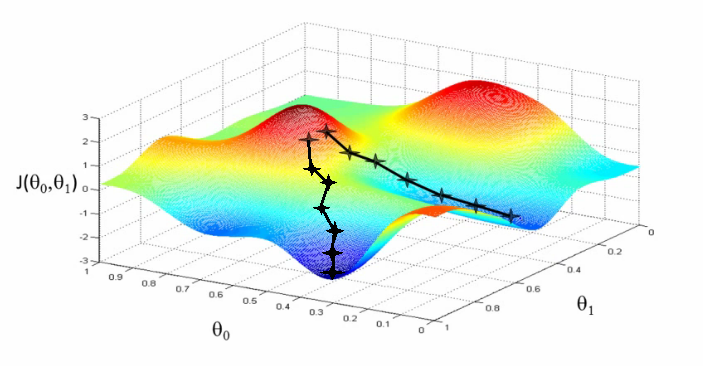

In [57]:
from IPython.display import Image
Image('gradient-descent.png')

# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>